# 0. Download the dataset

In [1]:
!wget 'https://raw.githubusercontent.com/skalsangra/Bank-Marketing-Data-Analysis/master/marketing-data.csv'

--2022-05-27 06:47:58--  https://raw.githubusercontent.com/skalsangra/Bank-Marketing-Data-Analysis/master/marketing-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3751315 (3.6M) [text/plain]
Saving to: ‘marketing-data.csv’

marketing-data.csv  100%[===================>]   3.58M  --.-KB/s    in 0.07s   

2022-05-27 06:47:58 (53.4 MB/s) - ‘marketing-data.csv’ saved [3751315/3751315]



# 1. Loading required Libraries and Dataset

In [2]:
# Load libraries
%matplotlib inline
import matplotlib.pyplot as plt
#setting dimension of graph
plt.rcParams["figure.figsize"]= (12, 7)

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from IPython.display import clear_output
from imblearn.over_sampling import SMOTE
from collections import Counter
from prettytable import PrettyTable

In [3]:
# Load dataset
url = "marketing-data.csv"
dataset = pd.read_csv(url)

# 2. Data Exploration and Pre-processing

In [4]:
#Information of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  is_success  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are we have 45211 observations of 17 variables (7-Numerical Variables and 10-Categorical Variables).

In [5]:
#check for any missing values
dataset.apply(lambda x: sum(x.isnull()),axis=0)

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
is_success    0
dtype: int64

In [6]:
# Target variable distribution
count = dataset.groupby('is_success').size()
percent = count/len(dataset)*100
print(percent)

is_success
no     88.30152
yes    11.69848
dtype: float64


From the distribution of Target variable: "is_success" it is found that data is imbalanced becouse there is approx 88% is 'no' and 12% is 'yes'.

## Analysis of Indepedent Numerical Variables

In [7]:
#lets see statistic of Numerical variables before Outlier treatment
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
def fix_outliers(dataset, col):
    mean_data, std_data = dataset[col].mean(), dataset[col].std()
    median_data  = dataset[col].median()
    limit_std = 3*std_data
    lower_std, upper_std = mean_data - limit_std, mean_data + limit_std

    col_values = dataset[col].values
    dataset[col] = np.where(np.logical_or(col_values<lower_std, col_values>upper_std), median_data, col_values)
    return dataset

#### "age"

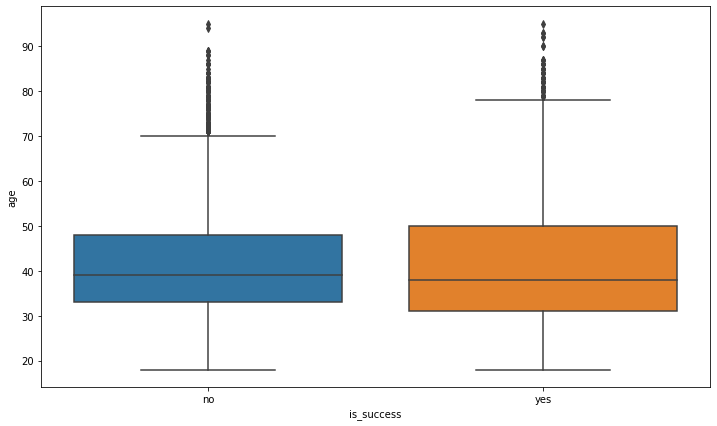

In [9]:
# age
sns.boxplot(x='is_success', y='age', data=dataset)

#### "balance"

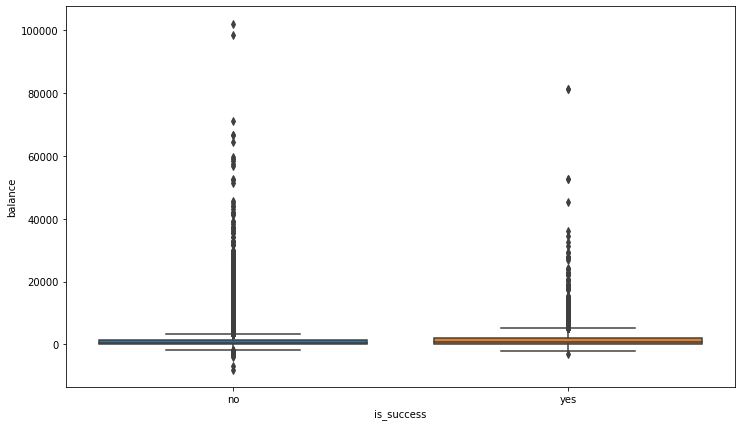

In [10]:
sns.boxplot(x='is_success', y='balance', data=dataset)

In [11]:
# Fixing balance column
dataset_new = dataset.copy()
dataset_new = fix_outliers(dataset=dataset_new, col='balance')

In [12]:
dataset_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1074.055318,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,1708.752554,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1322.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,10483.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### "day"

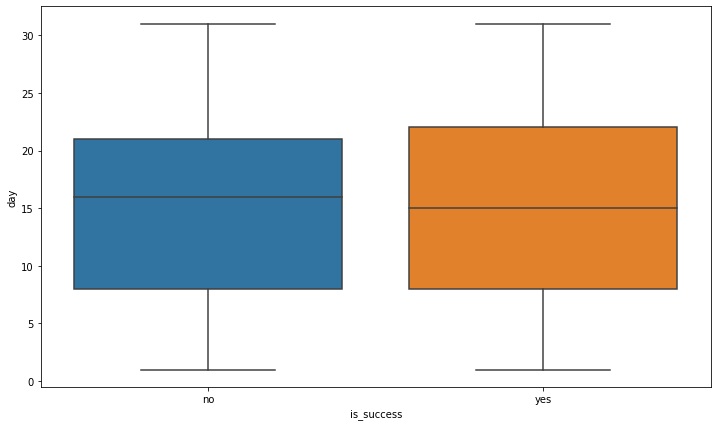

In [13]:
sns.boxplot(x='is_success', y='day', data=dataset)

#### "duration"

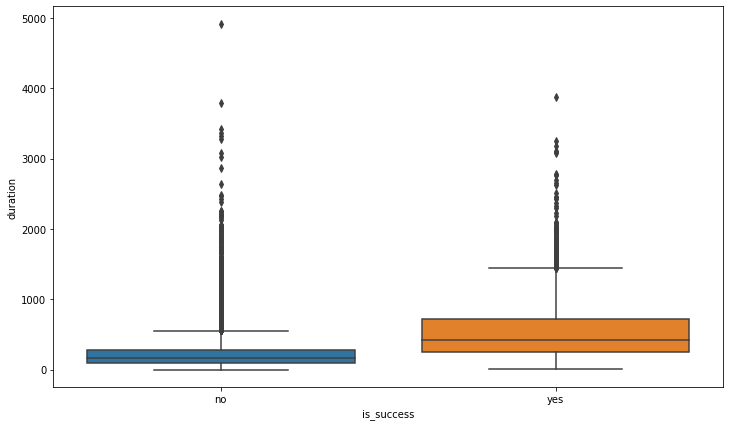

In [14]:
sns.boxplot(x='is_success', y='duration', data=dataset)

#### "compaign"

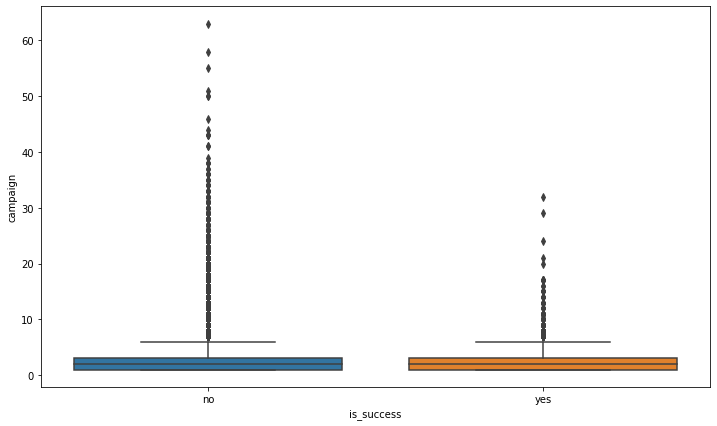

In [15]:
sns.boxplot(x='is_success', y='campaign', data=dataset)

In [16]:
# Fixing campaign column
dataset_new = fix_outliers(dataset=dataset_new, col='campaign')

#### "pdays"

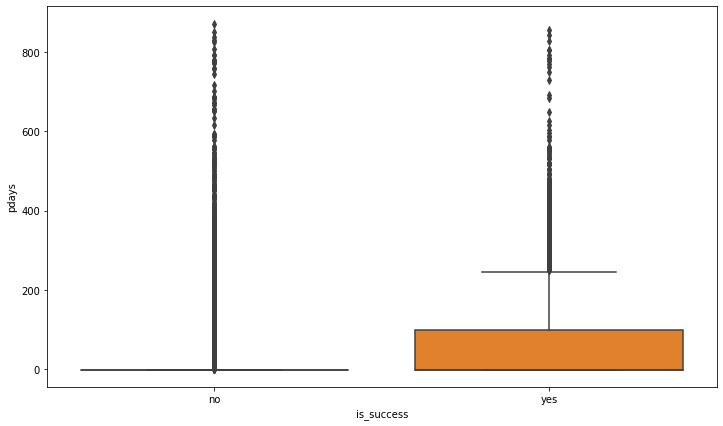

In [17]:
sns.boxplot(x='is_success', y='pdays', data=dataset)

In [18]:
# Fixing pdays column
dataset_new = fix_outliers(dataset=dataset_new, col='pdays')

#### "previous"

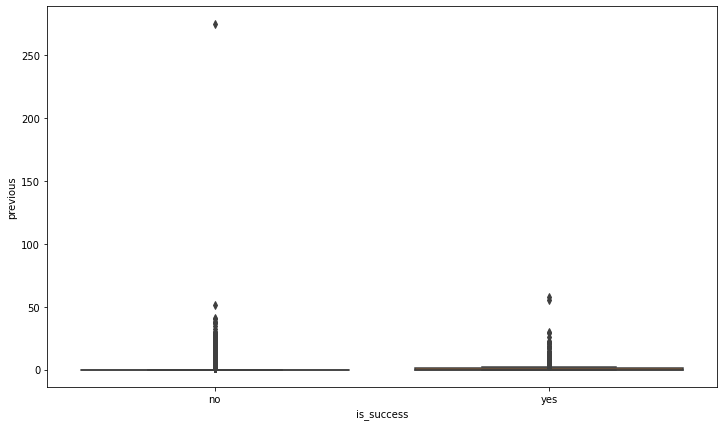

In [19]:
sns.boxplot(x='is_success', y='previous', data=dataset)

In [20]:
# Fixing 'previous' column
dataset_new = fix_outliers(dataset=dataset_new, col='previous')

In [21]:
#Statistic of Numerical variables after Outlier treatment
dataset_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1074.055318,15.806419,258.163080,2.446086,25.585477,0.412687
std,10.618762,1708.752554,8.322476,257.527812,1.923851,72.055550,1.119789
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1322.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,10483.000000,31.000000,4918.000000,12.000000,340.000000,7.000000


## Analysis of Indepedent Categorical Variables

In [22]:
# Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', dataset[column].mode(), col_values)
    return df

#### 'job'

job
admin.           11.437482
blue-collar      21.525735
entrepreneur      3.289023
housemaid         2.742695
management       20.919688
retired           5.007631
self-employed     3.492513
services          9.188029
student           2.074716
technician       16.803433
unemployed        2.882042
unknown           0.637013
dtype: float64


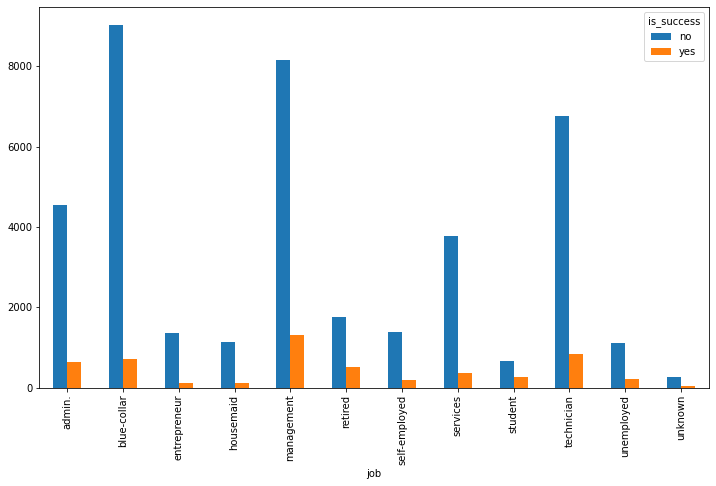

In [23]:
# job
temp1 = pd.crosstab(dataset['job'], dataset['is_success'])
temp1.plot(kind='bar')
print(dataset.groupby(['job']).size()/len(dataset)*100) 

In [24]:
dataset.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [25]:
table = PrettyTable(['Job', 'Total Clients', 'Success rate'])
table.add_row(['Blue-collar', len(dataset[dataset['job'] == 'blue-collar']), dataset[dataset['job'] == 
'blue-collar'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'blue-collar'])])
table.add_row(['Management', len(dataset[dataset['job'] == 'management']), dataset[dataset['job'] ==
'management'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'management'])])
table.add_row(['Technician', len(dataset[dataset['job'] == 'technician']), dataset[dataset['job'] ==
'technician'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'technician'])])
table.add_row(['Admin', len(dataset[dataset['job'] == 'admin.']), dataset[dataset['job'] == 
'admin.'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'admin.'])])
table.add_row(['Services', len(dataset[dataset['job'] == 'services']), dataset[dataset['job'] == 
'services'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'services'])])
table.add_row(['Retired', len(dataset[dataset['job'] == 'retired']), dataset[dataset['job'] ==
'retired'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'retired'])])
table.add_row(['Self-employed', len(dataset[dataset['job'] == 'self-employed']), dataset[dataset['job'] ==
'self-employed'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'self-employed'])])
table.add_row(['Entrepreneur', len(dataset[dataset['job'] == 'entrepreneur']), dataset[dataset['job'] == 
'entrepreneur'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'entrepreneur'])])
table.add_row(['Unemployed', len(dataset[dataset['job'] == 'unemployed']), dataset[dataset['job'] ==
'unemployed'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'unemployed'])])
table.add_row(['Housemaid', len(dataset[dataset['job'] == 'housemaid']), dataset[dataset['job'] == 'housemaid']
.is_success.value_counts()[1]/len(dataset[dataset['job'] == 'housemaid'])])
table.add_row(['Student', len(dataset[dataset['job'] == 'student']), dataset[dataset['job'] ==
'student'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'student'])])
table.add_row(['Unknown', len(dataset[dataset['job'] == 'unknown']), dataset[dataset['job'] ==
'unknown'].is_success.value_counts()[1]/len(dataset[dataset['job'] == 'unknown'])])
print(table)

+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      9732     | 0.07274969173859433 |
|   Management  |      9458     | 0.13755550856417847 |
|   Technician  |      7597     | 0.11056996182703699 |
|     Admin     |      5171     | 0.12202668729452718 |
|    Services   |      4154     | 0.08883004333172845 |
|    Retired    |      2264     | 0.22791519434628976 |
| Self-employed |      1579     | 0.11842938568714376 |
|  Entrepreneur |      1487     | 0.08271687962340282 |
|   Unemployed  |      1303     | 0.15502686108979277 |
|   Housemaid   |      1240     | 0.08790322580645162 |
|    Student    |      938      |  0.2867803837953092 |
|    Unknown    |      288      | 0.11805555555555555 |
+---------------+---------------+---------------------+


In [26]:
dataset_new = impute_unknowns(df= dataset_new, column='job')

#### "marital"

marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


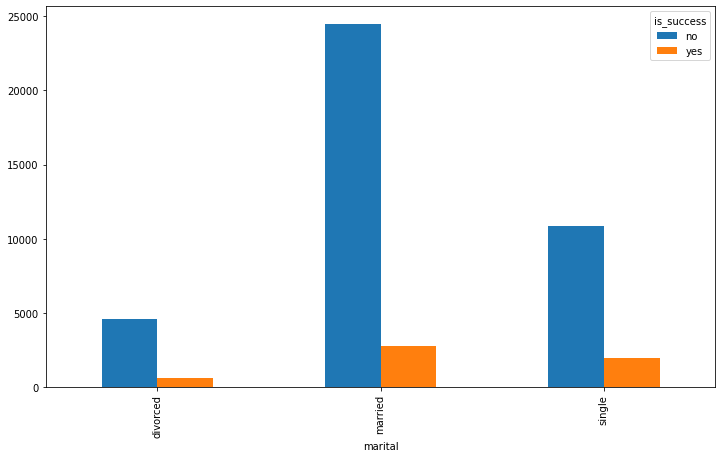

In [27]:
# marital
temp2 = pd.crosstab(dataset['marital'], dataset['is_success'])
temp2.plot(kind='bar')
print(dataset.groupby(['marital']).size()/len(dataset)*100) 

In [28]:
table = PrettyTable(['Marital', 'Total Clients', 'Success rate'])
table.add_row(['Married', len(dataset[dataset['marital'] == 'married']), dataset[dataset['marital'] ==
'married'].is_success.value_counts()[1]/len(dataset[dataset['marital'] == 'married'])])
table.add_row(['Single', len(dataset[dataset['marital'] == 'single']), dataset[dataset['marital'] ==
'single'].is_success.value_counts()[1]/len(dataset[dataset['marital'] == 'single'])])
table.add_row(['Divorced', len(dataset[dataset['marital'] == 'divorced']), dataset[dataset['marital'] ==
'divorced'].is_success.value_counts()[1]/len(dataset[dataset['marital'] == 'divorced'])])
print(table)

+----------+---------------+---------------------+
| Marital  | Total Clients |     Success rate    |
+----------+---------------+---------------------+
| Married  |     27214     | 0.10123465863158668 |
|  Single  |     12790     |  0.1494917904612979 |
| Divorced |      5207     | 0.11945458037257538 |
+----------+---------------+---------------------+


#### "education"

education
primary      15.153392
secondary    51.319369
tertiary     29.419831
unknown       4.107407
dtype: float64


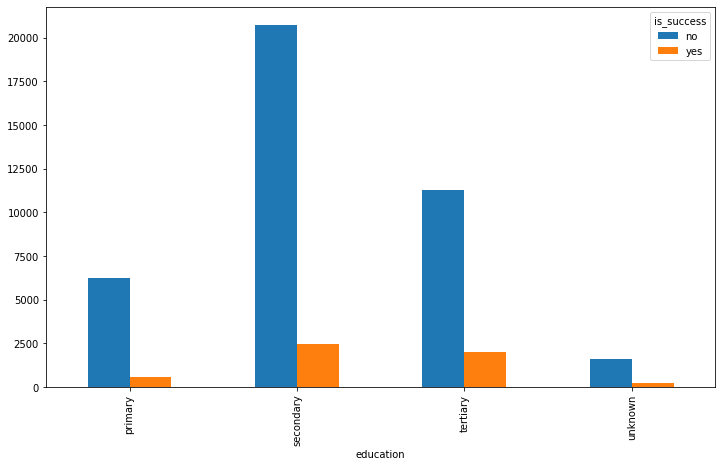

In [29]:
# education
temp3 = pd.crosstab(dataset['education'], dataset['is_success'])
temp3.plot(kind='bar')
print(dataset.groupby(['education']).size()/len(dataset)*100) 

In [30]:
table = PrettyTable(['Education', 'Total Clients', 'Success rate'])

table.add_row(['secondary', len(dataset[dataset['education'] == 'secondary']), dataset[dataset['education'] ==
'secondary'].is_success.value_counts()[1]/len(dataset[dataset['education'] == 'secondary'])])
table.add_row(['tertiary', len(dataset[dataset['education'] == 'tertiary']), dataset[dataset['education'] ==
'tertiary'].is_success.value_counts()[1]/len(dataset[dataset['education'] == 'tertiary'])])
table.add_row(['primary', len(dataset[dataset['education'] == 'primary']), dataset[dataset['education'] ==
'primary'].is_success.value_counts()[1]/len(dataset[dataset['education'] == 'primary'])])
table.add_row(['unknown', len(dataset[dataset['education'] == 'unknown']), dataset[dataset['education'] ==
'unknown'].is_success.value_counts()[1]/len(dataset[dataset['education'] == 'unknown'])])
print(table)

+-----------+---------------+---------------------+
| Education | Total Clients |     Success rate    |
+-----------+---------------+---------------------+
| secondary |     23202     | 0.10559434531505904 |
|  tertiary |     13301     | 0.15006390496955116 |
|  primary  |      6851     | 0.08626477886439936 |
|  unknown  |      1857     | 0.13570274636510501 |
+-----------+---------------+---------------------+


In [31]:
dataset_new = impute_unknowns(df=dataset_new, column='education')

#### "default"

default
no     98.197341
yes     1.802659
dtype: float64


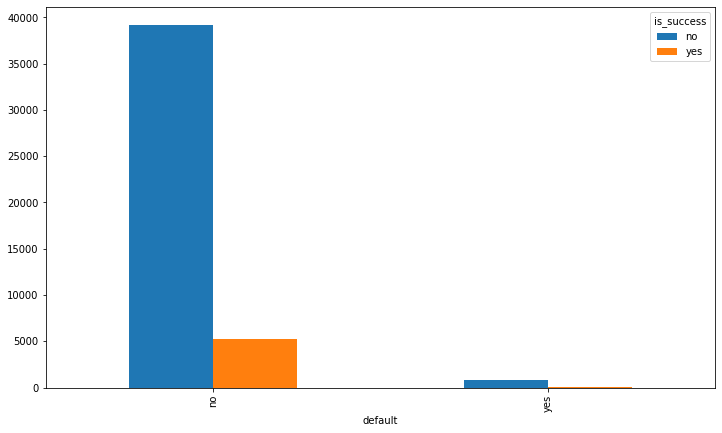

In [32]:
# default
temp4 = pd.crosstab(dataset['default'], dataset['is_success'])
temp4.plot(kind='bar')
print(dataset.groupby(['default']).size()/len(dataset)*100) 

#### This variable seems highly unbalanced (skewed) so we can drop this.

In [33]:
#dropping variable 'default'
del dataset_new['default']

#### "housing"

housing
no     44.416182
yes    55.583818
dtype: float64


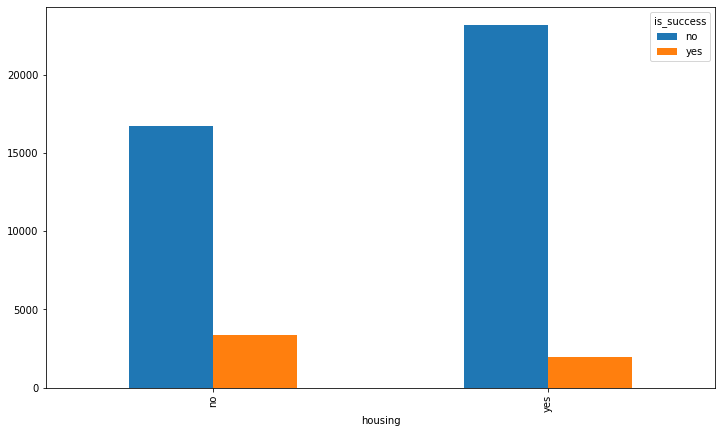

In [34]:
# housing
temp5 = pd.crosstab(dataset['housing'], dataset['is_success'])
temp5.plot(kind='bar')
print(dataset.groupby(['housing']).size()/len(dataset)*100) 

In [35]:
table = PrettyTable(['Housing', 'Total Clients', 'Success rate'])

table.add_row(['Yes', len(dataset[dataset['housing'] == 'yes']), dataset[dataset['housing'] ==
'yes'].is_success.value_counts()[1]/len(dataset[dataset['housing'] == 'yes'])])
table.add_row(['No', len(dataset[dataset['housing'] == 'no']), dataset[dataset['housing'] ==
'no'].is_success.value_counts()[1]/len(dataset[dataset['housing'] == 'no'])])

print(table)

+---------+---------------+---------------------+
| Housing | Total Clients |     Success rate    |
+---------+---------------+---------------------+
|   Yes   |     25130     | 0.07699960206923995 |
|    No   |     20081     |  0.1670235546038544 |
+---------+---------------+---------------------+


#### "contact"

contact
cellular     64.774059
telephone     6.427639
unknown      28.798301
dtype: float64


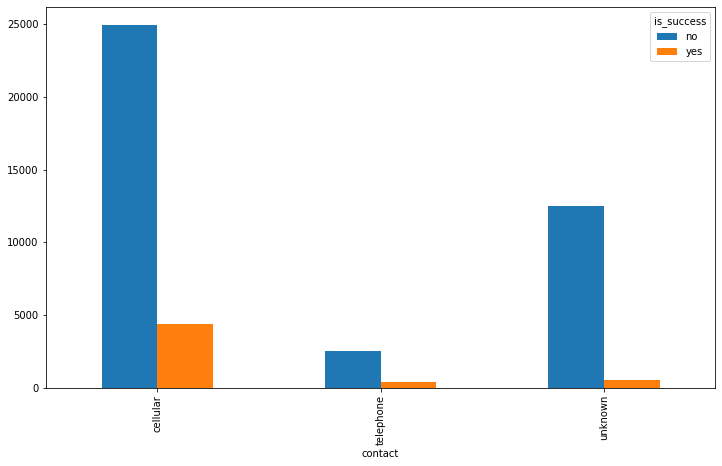

In [36]:
# "contact"
temp6 = pd.crosstab(dataset['contact'], dataset['is_success'])
temp6.plot(kind='bar')
print(dataset.groupby(['contact']).size()/len(dataset)*100) 

In [37]:
table = PrettyTable(['Contact', 'Total Clients', 'Success rate'])

table.add_row(['cellular', len(dataset[dataset['contact'] == 'cellular']), dataset[dataset['contact'] ==
'cellular'].is_success.value_counts()[1]/len(dataset[dataset['contact'] == 'cellular'])])
table.add_row(['unknown', len(dataset[dataset['contact'] == 'unknown']), dataset[dataset['contact'] ==
'unknown'].is_success.value_counts()[1]/len(dataset[dataset['contact'] == 'unknown'])])
table.add_row(['telephone', len(dataset[dataset['contact'] == 'telephone']), dataset[dataset['contact'] ==
'telephone'].is_success.value_counts()[1]/len(dataset[dataset['contact'] == 'telephone'])])
print(table)

+-----------+---------------+----------------------+
|  Contact  | Total Clients |     Success rate     |
+-----------+---------------+----------------------+
|  cellular |     29285     | 0.14918900460986853  |
|  unknown  |     13020     | 0.040706605222734255 |
| telephone |      2906     | 0.13420509291121818  |
+-----------+---------------+----------------------+


In [38]:
# 'Contact' variable does not have any impact on target variable so we can drop this variable.
del dataset_new['contact']

#### "month"

month
apr     6.485147
aug    13.817434
dec     0.473336
feb     5.859194
jan     3.103227
jul    15.250713
jun    11.813497
mar     1.055053
may    30.448342
nov     8.781049
oct     1.632346
sep     1.280662
dtype: float64


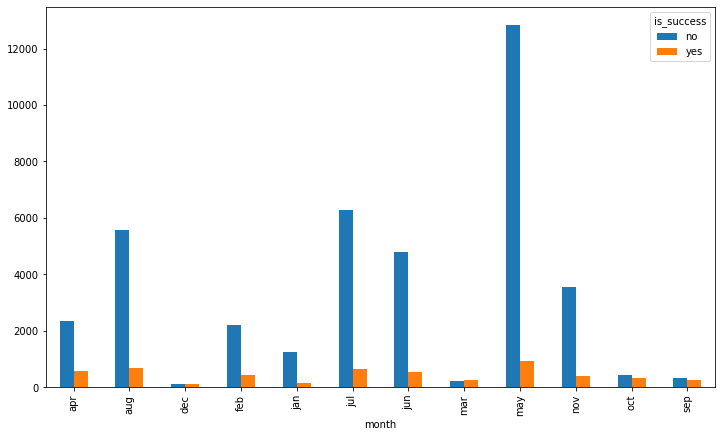

In [39]:
# "month"
temp7 = pd.crosstab(dataset['month'], dataset['is_success'])
temp7.plot(kind='bar')
print(dataset.groupby(['month']).size()/len(dataset)*100) 

In [40]:
dataset_new.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [41]:
print('Success rate and total clients contacted for different months:')
print('Clients contacted in January: {}, Success rate: {}'.format(len(dataset[dataset['month'] ==
'jan']), dataset[dataset['month'] == 'jan'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'jan'])))
print('Clients contacted in February: {}, Success rate: {}'.format(len(dataset[dataset['month'] == 'feb']
), dataset[dataset['month'] == 'feb'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'feb'])))
print('Clients contacted in March: {}, Success rate: {}'.format(len(dataset[dataset['month'] == 'mar']),
dataset[dataset['month'] == 'mar'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'mar'])))
print('Clients contacted in April: {}, Success rate: {}'.format(len(dataset[dataset['month'] == 'apr']),
dataset[dataset['month'] == 'apr'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'apr'])))
print('Clients contacted in May: {}, Success rate: {}'.format(len(dataset[dataset['month'] == 'may']), 
dataset[dataset['month'] == 'may'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'may'])))
print('Clients contacted in June: {}, Success rate: {}'.format(len(dataset[dataset['month'] == 'jun']), 
dataset[dataset['month'] == 'jun'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'jun'])))
print('Clients contacted in July: {}, Success rate: {}'.format(len(dataset[dataset['month'] == 'jul']), 
dataset[dataset['month'] == 'jul'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'jul'])))
print('Clients contacted in August: {}, Success rate: {}'.format(len(dataset[dataset['month'] == 'aug']),
dataset[dataset['month'] == 'aug'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'aug'])))
print('Clients contacted in September: {}, Success rate: {}'.format(len(dataset[dataset['month'] == 'sep'
]), dataset[dataset['month'] == 'sep'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'sep'])))
print('Clients contacted in October: {}, Success rate: {}'.format(len(dataset[dataset['month'] ==
'oct']), dataset[dataset['month'] == 'oct'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'oct'])))
print('Clients contacted in November: {}, Success rate: {}'.format(len(dataset[dataset['month'] == 'nov']
), dataset[dataset['month'] == 'nov'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'nov'])))
print('Clients contacted in December: {}, Success rate: {}'.format(len(dataset[dataset['month'] == 'dec']
), dataset[dataset['month'] == 'dec'].is_success.value_counts()[1]/len(dataset[dataset['month'] == 'dec'])))

Success rate and total clients contacted for different months:
Clients contacted in January: 1403, Success rate: 0.10121168923734854
Clients contacted in February: 2649, Success rate: 0.1664779161947905
Clients contacted in March: 477, Success rate: 0.480083857442348
Clients contacted in April: 2932, Success rate: 0.19679399727148705
Clients contacted in May: 13766, Success rate: 0.06719453726572715
Clients contacted in June: 5341, Success rate: 0.10222804718217562
Clients contacted in July: 6895, Success rate: 0.09093546047860769
Clients contacted in August: 6247, Success rate: 0.11013286377461182
Clients contacted in September: 579, Success rate: 0.46459412780656306
Clients contacted in October: 738, Success rate: 0.43766937669376693
Clients contacted in November: 3970, Success rate: 0.10151133501259446
Clients contacted in December: 214, Success rate: 0.4672897196261682


#### "poutcome"

poutcome
failure    10.840282
other       4.069806
success     3.342107
unknown    81.747805
dtype: float64


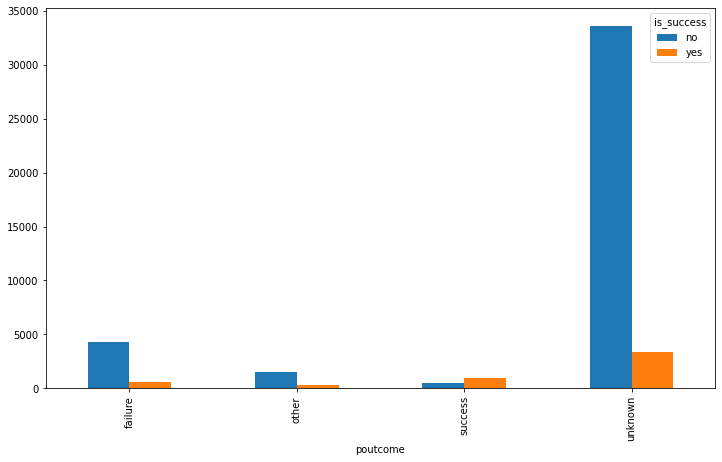

In [42]:
# "poutcome"
temp8 = pd.crosstab(dataset['poutcome'], dataset['is_success'])
temp8.plot(kind='bar')
print(dataset.groupby(['poutcome']).size()/len(dataset)*100) 

"poutcome" also have more than 81% missing values so we can drop this variable also.

In [43]:
#dropping variable 'poutcome'
del dataset_new['poutcome']

#### "loan"

loan
no     83.977351
yes    16.022649
dtype: float64


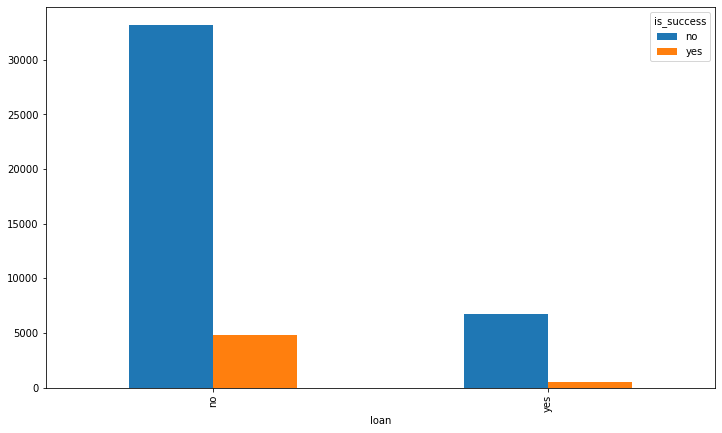

In [44]:
# "loan"
temp9 = pd.crosstab(dataset['loan'], dataset['is_success'])
temp9.plot(kind='bar')
print(dataset.groupby(['loan']).size()/len(dataset)*100) 

In [45]:
table = PrettyTable(['Loan', 'Total Clients', 'Success rate'])

table.add_row(['No', len(dataset[dataset['loan'] == 'no']), dataset[dataset['loan'] ==
'no'].is_success.value_counts()[1]/len(dataset[dataset['loan'] == 'no'])])
table.add_row(['Yes', len(dataset[dataset['loan'] == 'yes']), dataset[dataset['loan'] ==
'yes'].is_success.value_counts()[1]/len(dataset[dataset['loan'] == 'yes'])])

print(table)


+------+---------------+---------------------+
| Loan | Total Clients |     Success rate    |
+------+---------------+---------------------+
|  No  |     37967     | 0.12655727342165565 |
| Yes  |      7244     | 0.06681391496410823 |
+------+---------------+---------------------+


In [46]:
#Convert from character to int with binary variable
# 1 means yes, 0 means no
dataset_new["housing"].replace({"yes": "1", "no": "0"}, inplace=True)
dataset_new["loan"].replace({"yes": "1", "no": "0"}, inplace=True)

In [47]:
#Convert datatype from object to int32
dataset_new["loan"] = dataset_new["loan"].astype(str).astype(int)
dataset_new["housing"] = dataset_new["housing"].astype(str).astype(int)

### Updated Dataset after Exploratary Data Analysis:

In [48]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         45211 non-null  int64  
 1   job         45211 non-null  object 
 2   marital     45211 non-null  object 
 3   education   45211 non-null  object 
 4   balance     45211 non-null  float64
 5   housing     45211 non-null  int64  
 6   loan        45211 non-null  int64  
 7   day         45211 non-null  int64  
 8   month       45211 non-null  object 
 9   duration    45211 non-null  int64  
 10  campaign    45211 non-null  float64
 11  pdays       45211 non-null  float64
 12  previous    45211 non-null  float64
 13  is_success  45211 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 4.8+ MB


In [49]:
dataset_new.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,is_success
0,58,management,married,tertiary,2143.0,1,0,5,may,261,1.0,-1.0,0.0,no
1,44,technician,single,secondary,29.0,1,0,5,may,151,1.0,-1.0,0.0,no
2,33,entrepreneur,married,secondary,2.0,1,1,5,may,76,1.0,-1.0,0.0,no
3,47,blue-collar,married,secondary,1506.0,1,0,5,may,92,1.0,-1.0,0.0,no
4,33,blue-collar,single,secondary,1.0,0,0,5,may,198,1.0,-1.0,0.0,no


# 3.Visualization

## a) Khía cạnh age

In [50]:
dataset_new.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [51]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, dataset_new.age.quantile(x/100)))
iqr = dataset_new.age.quantile(0.75) - dataset_new.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR 15.0


In [52]:
lst = [dataset_new]
for column in lst:
    column.loc[column["age"] < 30, 'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
count_age_response_pct = pd.crosstab(dataset_new['is_success'],dataset_new['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

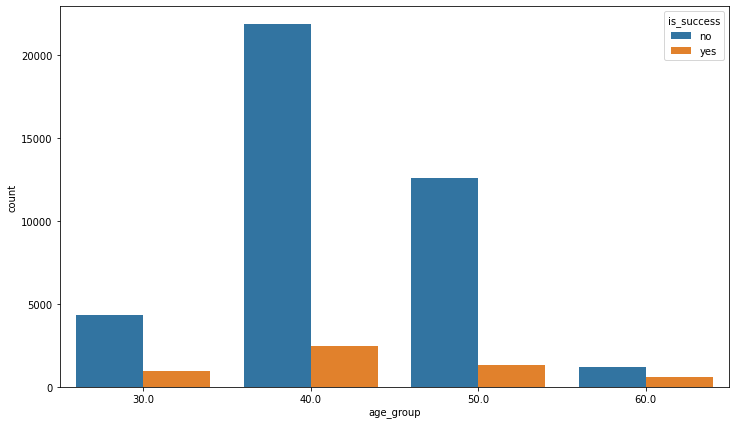

In [53]:
sns.countplot(x='age_group', data=dataset_new, hue='is_success');

In [54]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(dataset_new[dataset_new['age_group'] == 30]),dataset_new[dataset_new['age_group'] == 30].is_success.value_counts()[1]/len(dataset_new[dataset_new['age_group'] == 30])))

print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(dataset_new[dataset_new['age_group'] == 40]), dataset_new[dataset_new['age_group'] == 40].is_success.value_counts()[1]/len(dataset_new[dataset_new['age_group'] == 40])))

print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(dataset_new[dataset_new['age_group'] == 50]), dataset_new[dataset_new['age_group'] == 50].is_success.value_counts()[1]/len(dataset_new[dataset_new['age_group'] == 50])))

print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(dataset_new[dataset_new['age_group'] == 60]), dataset_new[dataset_new['age_group'] == 60].is_success.value_counts()[1]/len(dataset_new[dataset_new['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 5273, Success rate: 0.1759908970225678
Clients of age 30-45 contacted: 24274, Success rate: 0.10117821537447474
Clients of age 40-60 contacted: 13880, Success rate: 0.09402017291066282
Clients of 60+ age contacted: 1784, Success rate: 0.336322869955157


## b) Khía cạnh số dư và tỷ lệ success theo từng khoảng số dư

In [55]:
dataset_new.balance.describe()

count    45211.000000
mean      1074.055318
std       1708.752554
min      -6847.000000
25%         72.000000
50%        448.000000
75%       1322.000000
max      10483.000000
Name: balance, dtype: float64

In [56]:
lst = [dataset_new]
for column in lst:
    column.loc[column["balance"] < 0, 'balance_group'] = 0
    column.loc[(column["balance"] >= 0)&(column['balance']< 1000) , 'balance_group'] = 1000
    column.loc[(column["balance"] >= 1000) & (column["balance"] < 2000), 'balance_group'] = 2000
    column.loc[(column["balance"] >= 2000) & (column["balance"] < 3000), 'balance_group'] = 3000    
    column.loc[(column["balance"] >= 3000) & (column["balance"] < 4000), 'balance_group'] = 4000
    column.loc[(column["balance"] >= 4000) & (column["balance"] < 5000), 'balance_group'] = 5000
    column.loc[column["balance"] >= 5000, 'balance_group'] = 6000
count_balance_response_pct = pd.crosstab(dataset_new['is_success'],
dataset_new['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

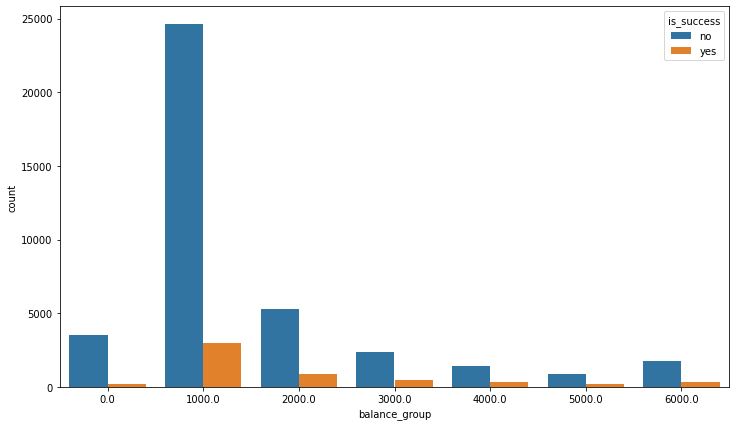

In [57]:
sns.countplot(x='balance_group', data=dataset_new, hue='is_success');

In [58]:
print('Success rate for different balance_group:')
print('Balance < 0: {}, Success rate: {}'.format(len(dataset_new[dataset_new['balance_group'] == 0])
,dataset_new[dataset_new['balance_group'] == 0].is_success.value_counts()[1]/len(dataset_new[dataset_new['balance_group'] == 0])))
print('Balance < 1000: {}, Success rate: {}'.format(len(dataset_new[dataset_new['balance_group'] == 1000])
,dataset_new[dataset_new['balance_group'] == 1000].is_success.value_counts()[1]/len(dataset_new[dataset_new['balance_group'] == 1000])))

print('Balance < 2000: {}, Success rate: {}'.format(len(dataset_new[dataset_new['balance_group'] == 2000])
,dataset_new[dataset_new['balance_group'] == 2000].is_success.value_counts()[1]/len(dataset_new[dataset_new['balance_group'] == 2000])))
print('Balance < 3000: {}, Success rate: {}'.format(len(dataset_new[dataset_new['balance_group'] == 3000])
,dataset_new[dataset_new['balance_group'] == 3000].is_success.value_counts()[1]/len(dataset_new[dataset_new['balance_group'] == 3000])))
print('Balance < 4000: {}, Success rate: {}'.format(len(dataset_new[dataset_new['balance_group'] == 4000])
,dataset_new[dataset_new['balance_group'] == 4000].is_success.value_counts()[1]/len(dataset_new[dataset_new['balance_group'] == 4000])))
print('Balance < 5000: {}, Success rate: {}'.format(len(dataset_new[dataset_new['balance_group'] == 5000])
,dataset_new[dataset_new['balance_group'] == 5000].is_success.value_counts()[1]/len(dataset_new[dataset_new['balance_group'] == 5000])))
print('Balance > 6000: {}, Success rate: {}'.format(len(dataset_new[dataset_new['balance_group'] == 6000])
,dataset_new[dataset_new['balance_group'] == 6000].is_success.value_counts()[1]/len(dataset_new[dataset_new['balance_group'] == 6000])))

Success rate for different balance_group:
Balance < 0: 3765, Success rate: 0.055776892430278883
Balance < 1000: 27548, Success rate: 0.10697691302453899
Balance < 2000: 6136, Success rate: 0.13754889178617993
Balance < 3000: 2891, Success rate: 0.17018332756831547
Balance < 4000: 1716, Success rate: 0.17424242424242425
Balance < 5000: 1052, Success rate: 0.1682509505703422
Balance > 6000: 2103, Success rate: 0.15216357584403234


##  c) Biểu đồ thể hiện liên hệ giữ tuổi và số dư

Text(0.5, 1.0, 'Mối liên hệ giữa Tuổi và Số dư')

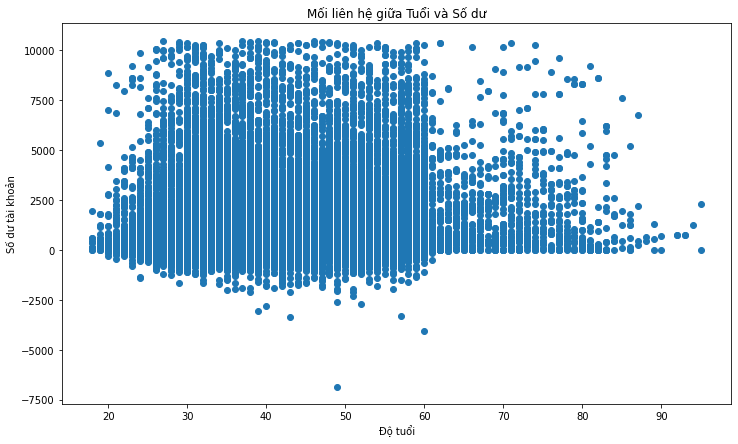

In [59]:
plt.scatter(dataset_new['age'], dataset_new['balance'])
plt.xlabel('Độ tuổi')
plt.ylabel('Số dư tài khoản')
plt.title('Mối liên hệ giữa Tuổi và Số dư')

In [60]:
print('Mean balance of each age_group')
print('Mean balance of age < 30:  {}'.format(dataset_new[dataset_new['age_group'] == 30]['balance'].mean()))
print('Mean balance of age_group 30-45:  {}'.format(dataset_new[dataset_new['age_group'] == 40]['balance'].mean()))
print('Mean balance of age_group 45-60:  {}'.format(dataset_new[dataset_new['age_group'] == 50]['balance'].mean()))
print('Mean balance of age_group > 60:  {}'.format(dataset_new[dataset_new['age_group'] == 60]['balance'].mean()))

Mean balance of each age_group
Mean balance of age < 30:  838.8374739237626
Mean balance of age_group 30-45:  1008.8697783636813
Mean balance of age_group 45-60:  1198.7819884726225
Mean balance of age_group > 60:  1685.8329596412557


In [61]:
print('Age_group rate')
print('Clients age < 30 rate: {}'.format(dataset_new[dataset_new['age_group'] == 30]['age_group'].count()/len(dataset_new['age_group'])))

print('Clients age  30-45 rate: {}'.format(dataset_new[dataset_new['age_group'] == 40]['age_group'].count()/len(dataset_new['age_group'])))

print('Clients age  40-60 rate: {}'.format(dataset_new[dataset_new['age_group'] == 50]['age_group'].count()/len(dataset_new['age_group'])))

print('Clients age > 60 rate: {}'.format(dataset_new[dataset_new['age_group'] == 60]['age_group'].count()/len(dataset_new['age_group'])))

Age_group rate
Clients age < 30 rate: 0.11663090840724602
Clients age  30-45 rate: 0.5369047355732012
Clients age  40-60 rate: 0.30700493242794896
Clients age > 60 rate: 0.039459423591603815


## d) Biểu đồ thể hiện mối liên hệ giữa housing/loan với balance 

In [62]:
dataset_new['housing loan/loan'] = np.nan
lst = [dataset_new]

for col in lst:
    col.loc[(col['housing'] == 1) & (dataset_new['loan'] == 1), 'housing loan/loan'] = 'has house loan/has loan'
    col.loc[(col['housing'] == 1) & (dataset_new['loan'] == 0), 'housing loan/loan'] = 'has house loan/does not have loan'
    col.loc[(col['housing'] == 0) & (dataset_new['loan'] == 0), 'housing loan/loan'] = 'does not have house loan/does not have loan'
    col.loc[(col['housing'] == 0) & (dataset_new['loan'] == 1), 'housing loan/loan'] = 'does not have house loan/has loan'
    
dataset_new.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,is_success,age_group,balance_group,housing loan/loan
0,58,management,married,tertiary,2143.0,1,0,5,may,261,1.0,-1.0,0.0,no,50.0,3000.0,has house loan/does not have loan
1,44,technician,single,secondary,29.0,1,0,5,may,151,1.0,-1.0,0.0,no,40.0,1000.0,has house loan/does not have loan
2,33,entrepreneur,married,secondary,2.0,1,1,5,may,76,1.0,-1.0,0.0,no,40.0,1000.0,has house loan/has loan
3,47,blue-collar,married,secondary,1506.0,1,0,5,may,92,1.0,-1.0,0.0,no,50.0,2000.0,has house loan/does not have loan
4,33,blue-collar,single,secondary,1.0,0,0,5,may,198,1.0,-1.0,0.0,no,40.0,1000.0,does not have house loan/does not have loan


Text(0.5, 1.0, 'Median Balance by Housing loan/loan Group')

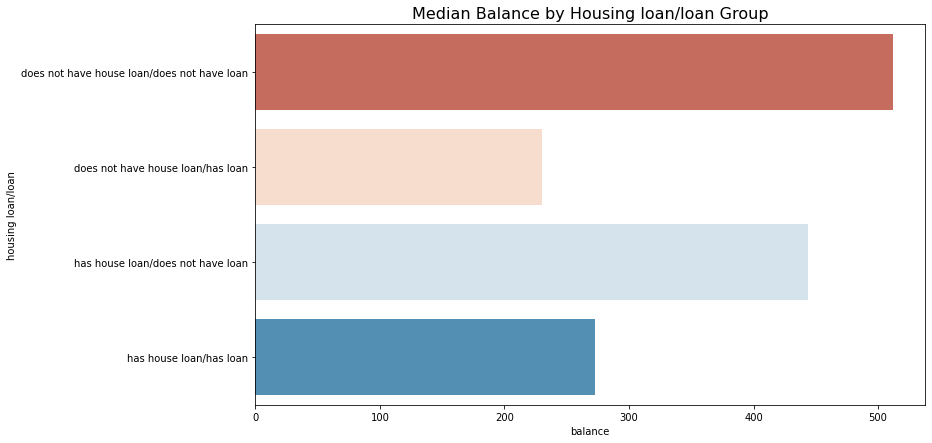

In [63]:
loan_groups = dataset_new.groupby(['housing loan/loan'], as_index=False)['balance'].median()


sns.barplot(x="balance", y="housing loan/loan", data=loan_groups, palette="RdBu")

plt.title('Median Balance by Housing loan/loan Group', fontsize=16)

## e) Chart boxplot thời gian và số lần gọi

In [64]:
dataset_new.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Text(0.5, 0, 'duration')

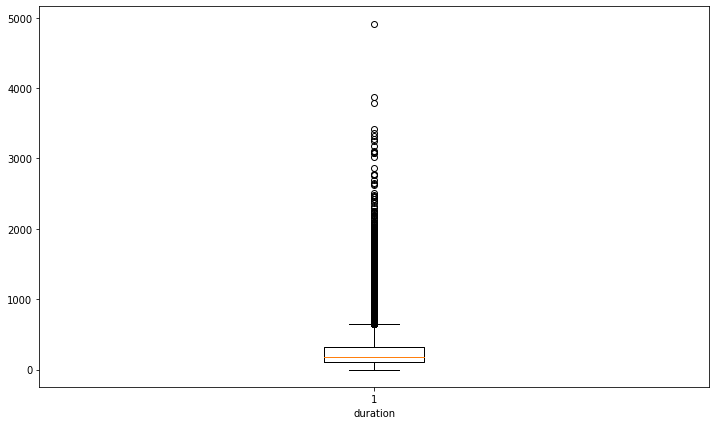

In [65]:
plt.boxplot(dataset_new['duration'])
plt.xlabel("duration")

Text(0.5, 0, 'campaign')

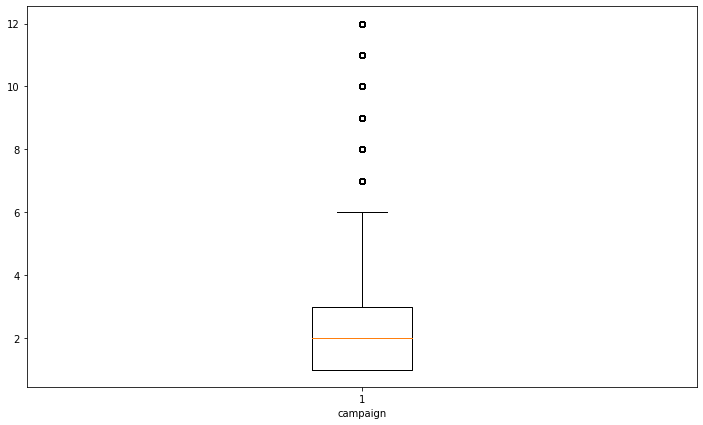

In [66]:
plt.boxplot(dataset_new['campaign'])
plt.xlabel("campaign")

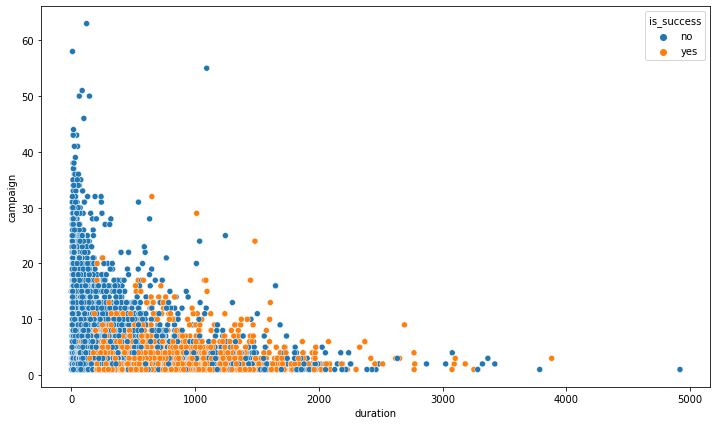

In [67]:
sns.scatterplot(x="duration",
                    y="campaign",
                    hue="is_success",
                    data=dataset)

## f) Mối liên hệ giữa số lần liên hệ với kết quả chấp nhận 


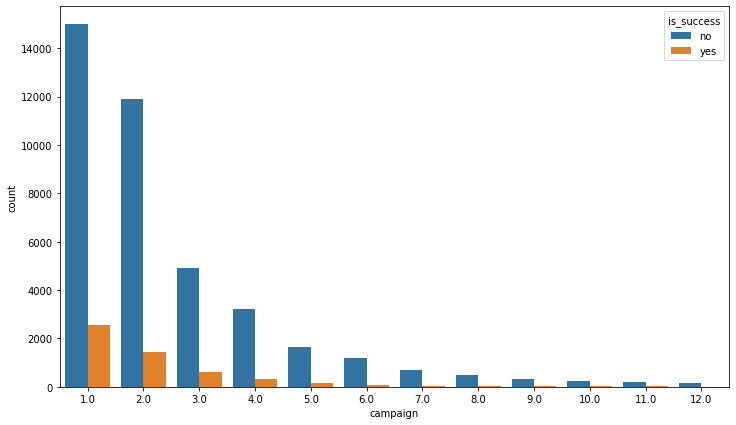

In [68]:
sns.countplot(x='campaign', data=dataset_new, hue='is_success');


In [69]:
dataset_new.campaign.describe()

count    45211.000000
mean         2.446086
std          1.923851
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         12.000000
Name: campaign, dtype: float64

In [70]:
lst = [dataset_new]
for column in lst:
    column.loc[column["campaign"] < 4, 'campaign_group'] = 4
    column.loc[(column["campaign"] >= 4) & (column["campaign"] < 8), 'campaign_group'] = 8
    column.loc[column["campaign"] >= 8, 'campaign_group'] = 12
    
count_campaign_response_pct = pd.crosstab(dataset_new['is_success'],dataset_new['campaign_group']).apply(lambda x: x/x.sum() * 100)
count_campaign_response_pct = count_campaign_response_pct.transpose()

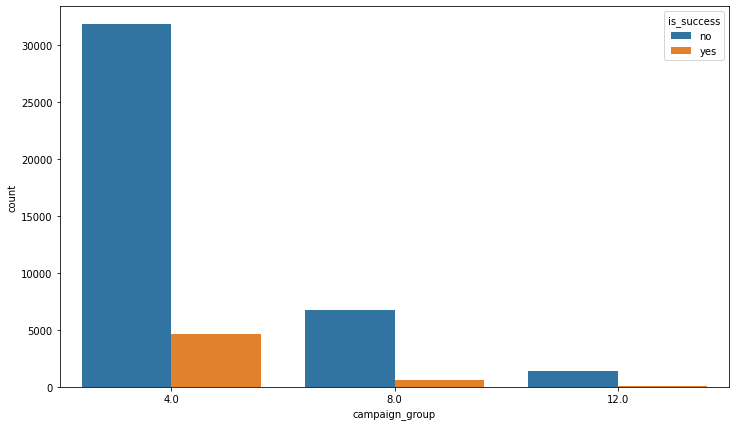

In [71]:
sns.countplot(x='campaign_group', data=dataset_new, hue='is_success');

In [72]:
print('Success rate for different campaign_group:')
print('Contact times < 4 times: {}, Success rate: {}'.format(len(dataset_new[dataset_new['campaign_group'] == 4]),dataset_new[dataset_new['campaign_group'] == 4].is_success.value_counts()[1]/len(dataset_new[dataset_new['campaign_group'] == 4])))

print('Contact times between 4 and 8 times: {}, Success rate: {}'.format(len(dataset_new[dataset_new['campaign_group'] == 8]),dataset_new[dataset_new['campaign_group'] == 8].is_success.value_counts()[1]/len(dataset_new[dataset_new['campaign_group'] == 8])))

print('Contact times between 8 and 12 times: {}, Success rate: {}'.format(len(dataset_new[dataset_new['campaign_group'] == 12]),dataset_new[dataset_new['campaign_group'] == 12].is_success.value_counts()[1]/len(dataset_new[dataset_new['campaign_group'] == 12])))


Success rate for different campaign_group:
Contact times < 4 times: 36410, Success rate: 0.12653117275473771
Contact times between 4 and 8 times: 7312, Success rate: 0.0813730853391685
Contact times between 8 and 12 times: 1489, Success rate: 0.05842847548690396


In [73]:
## 

## g) Biểu đồ giữa liên hệ và đăng ký thành công theo từng tháng 

In [74]:
df = dataset_new[dataset_new['is_success'] == 'yes']

In [75]:
success_by_month = df.groupby(['month'])['is_success'].count()

In [76]:
success_by_month

month
apr    577
aug    688
dec    100
feb    441
jan    142
jul    627
jun    546
mar    248
may    925
nov    403
oct    323
sep    269
Name: is_success, dtype: int64

In [77]:
df_success = pd.DataFrame({'is_success count': df.groupby(by = 'month')['is_success'].count()})

In [78]:
df_success['is_success_rate'] = (df_success['is_success count'] / df_success['is_success count'].sum())*100

In [79]:
df_success

,is_success count,is_success_rate
month,,
apr,577,10.909435
aug,688,13.008130
dec,100,1.890717
feb,441,8.338060
jan,142,2.684818
jul,627,11.854793
jun,546,10.323313
mar,248,4.688977
may,925,17.489128


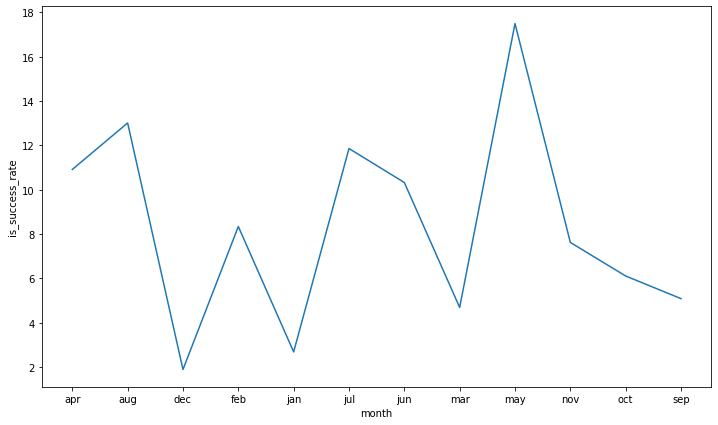

In [80]:
#Biểu đồ biểu thị mối liên hệ giữa tỉ lệ thành công theo từng tháng
sns.lineplot( x = "month",
             y = "is_success_rate",
             data = df_success);

In [81]:
df = dataset[dataset['contact'] == 'yes']

# 4. Feature Engineering

In [82]:
# Remove duration column
dataset_new = dataset_new.drop(['duration'], axis=1)

In [83]:
dataset_new = dataset_new.drop(['age_group', 'balance_group', 'housing loan/loan', 'campaign_group'], axis=1)

In [84]:
dataset_new.head()

,age,job,marital,education,balance,housing,loan,day,month,campaign,pdays,previous,is_success,campaign_group
0,58,management,married,tertiary,2143.0,1,0,5,may,1.0,-1.0,0.0,no,4.0
1,44,technician,single,secondary,29.0,1,0,5,may,1.0,-1.0,0.0,no,4.0
2,33,entrepreneur,married,secondary,2.0,1,1,5,may,1.0,-1.0,0.0,no,4.0
3,47,blue-collar,married,secondary,1506.0,1,0,5,may,1.0,-1.0,0.0,no,4.0
4,33,blue-collar,single,secondary,1.0,0,0,5,may,1.0,-1.0,0.0,no,4.0


In [85]:
#Seperating Target variable from other variables
dataset_Y = dataset_new['is_success']
dataset_X = dataset_new[dataset_new.columns[0:12]]

In [86]:
#converting Independent Categorical into Numeriacal by creating Dummy variables
dataset_X_dummy = pd.get_dummies(dataset_X)
print(dataset_X_dummy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   balance              45211 non-null  float64
 2   housing              45211 non-null  int64  
 3   loan                 45211 non-null  int64  
 4   day                  45211 non-null  int64  
 5   campaign             45211 non-null  float64
 6   pdays                45211 non-null  float64
 7   previous             45211 non-null  float64
 8   job_admin.           45211 non-null  uint8  
 9   job_blue-collar      45211 non-null  uint8  
 10  job_entrepreneur     45211 non-null  uint8  
 11  job_housemaid        45211 non-null  uint8  
 12  job_management       45211 non-null  uint8  
 13  job_retired          45211 non-null  uint8  
 14  job_self-employed    45211 non-null  uint8  
 15  job_services         45211 non-null 

#### After creating Dummy Variables we have now 37 Variables.

In [87]:
X = dataset_X_dummy
Y = dataset_Y

# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state= 0 )

In [88]:
# summarize class distribution
counter = Counter(Y_train)
print(counter)

# transform the dataset
oversample = SMOTE()
x_train_smote, y_train = oversample.fit_resample(X_train, Y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({'no': 31942, 'yes': 4226})
Counter({'yes': 31942, 'no': 31942})


# 5. Feature selection with RFE

In [89]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train_smote,y_train)
logistic_regression_model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [90]:
def selectFeatureRFE(n_features):
  rfe = RFE(logistic_regression_model, step=25, n_features_to_select=n_features)
  rfe = rfe.fit(x_train_smote, y_train)
  rfe_ = X_train.columns[rfe.support_]
  # rfe_
  selected_columns = x_train_smote.columns[rfe.support_]
  return selected_columns.tolist()

# 6. Model Training

In [91]:
def trainModel(featuresList):
  y_train.value_counts()
  # x_train_smote.info()
  X_train_final = x_train_smote[featuresList]
  y_train_final = y_train

  logreg = LogisticRegression()
  logreg.fit(X_train_final, y_train_final)

  X_test_final = X_validation[featuresList]
  y_test_final = Y_validation
  y_pred = logreg.predict(X_test_final)
  return y_pred

In [92]:
def evaluateModel(y_pred):
  print("Accuracy : ", accuracy_score(Y_validation, y_pred))

  print()
  print("Confusion matrix")
  print(confusion_matrix(Y_validation, y_pred))

  print()
  print("Report")
  print(classification_report(Y_validation, y_pred))

  print()
  precision,recall,fscore,support=score(Y_validation,y_pred,average='macro')
  print("F1 score")
  print(fscore)
  print("Precision score")
  print(precision)
  print("Recall score")
  print(recall)
  # print(precision_recall_fscore_support(Y_validation, y_pred))

  # print(precision_score(Y_validation, y_pred))
  # print(recall_score(Y_validation, y_pred)) 

# 7. Evaluation


In [93]:
n = 7
features = selectFeatureRFE(n)
pred = trainModel(features)
clear_output()
print("Feature list:")
print(features)
print("-------------------------------")
print("EVALUATION RESULT FOR N = ", n)
evaluateModel(pred)

Feature list:
['loan', 'job_technician', 'education_primary', 'education_secondary', 'education_tertiary', 'month_jul', 'month_may']
-------------------------------
EVALUATION RESULT FOR N =  7
Accuracy :  0.6721220833794095

Confusion matrix
[[5565 2415]
 [ 550  513]]

Report
              precision    recall  f1-score   support

          no       0.91      0.70      0.79      7980
         yes       0.18      0.48      0.26      1063

    accuracy                           0.67      9043
   macro avg       0.54      0.59      0.52      9043
weighted avg       0.82      0.67      0.73      9043


F1 score
0.5233600716902139
Precision score
0.5426310771684785
Recall score
0.5899824231321483


In [94]:
n = 15

features = selectFeatureRFE(n)
pred = trainModel(features)
clear_output()
print("Feature list:")
print(features)
print("-------------------------------")
print("EVALUATION RESULT FOR N = ", n)
evaluateModel(pred)



Feature list:
['housing', 'loan', 'previous', 'job_blue-collar', 'job_management', 'job_technician', 'marital_divorced', 'marital_married', 'education_primary', 'education_secondary', 'education_tertiary', 'month_aug', 'month_jul', 'month_jun', 'month_may']
-------------------------------
EVALUATION RESULT FOR N =  15
Accuracy :  0.8246157248700653

Confusion matrix
[[7127  853]
 [ 733  330]]

Report
              precision    recall  f1-score   support

          no       0.91      0.89      0.90      7980
         yes       0.28      0.31      0.29      1063

    accuracy                           0.82      9043
   macro avg       0.59      0.60      0.60      9043
weighted avg       0.83      0.82      0.83      9043


F1 score
0.5968647404589078
Precision score
0.5928474099789426
Recall score
0.6017749571482799


In [95]:
n = 20
features = selectFeatureRFE(n)
pred = trainModel(features)
clear_output()
print("Feature list:")
print(features)
print("-------------------------------")
print("EVALUATION RESULT FOR N = ", n)
evaluateModel(pred)

Feature list:
['housing', 'loan', 'previous', 'job_admin.', 'job_blue-collar', 'job_management', 'job_services', 'job_technician', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'month_aug', 'month_feb', 'month_jul', 'month_jun', 'month_may', 'month_nov']
-------------------------------
EVALUATION RESULT FOR N =  20
Accuracy :  0.8573482251465222

Confusion matrix
[[7489  491]
 [ 799  264]]

Report
              precision    recall  f1-score   support

          no       0.90      0.94      0.92      7980
         yes       0.35      0.25      0.29      1063

    accuracy                           0.86      9043
   macro avg       0.63      0.59      0.61      9043
weighted avg       0.84      0.86      0.85      9043


F1 score
0.6055661319758727
Precision score
0.6266322170088726
Recall score
0.5934124469216314


# 8. Test on sample data

In [117]:
dataset_new_dummies = pd.get_dummies(dataset_new[dataset_new.columns[0:12]])
dataset_new_dummies['is_success'] = dataset_new['is_success']

In [118]:
dataset_new_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  int64  
 1   balance              45211 non-null  float64
 2   housing              45211 non-null  int64  
 3   loan                 45211 non-null  int64  
 4   day                  45211 non-null  int64  
 5   campaign             45211 non-null  float64
 6   pdays                45211 non-null  float64
 7   previous             45211 non-null  float64
 8   job_admin.           45211 non-null  uint8  
 9   job_blue-collar      45211 non-null  uint8  
 10  job_entrepreneur     45211 non-null  uint8  
 11  job_housemaid        45211 non-null  uint8  
 12  job_management       45211 non-null  uint8  
 13  job_retired          45211 non-null  uint8  
 14  job_self-employed    45211 non-null  uint8  
 15  job_services         45211 non-null 

In [119]:
df_sample = dataset_new_dummies.sample(n=10, random_state =1, axis =0 )

In [120]:
df_sample

,age,balance,housing,loan,day,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,is_success
3610,42,2519.0,1,0,15,4.0,-1.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0,no
11677,37,2209.0,0,0,20,2.0,-1.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,no
33018,32,923.0,1,0,17,4.0,-1.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,no
44323,53,306.0,0,0,28,3.0,181.0,1.0,0,1,...,0,0,1,0,0,0,0,0,0,yes
8119,32,257.0,1,0,2,5.0,-1.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,no
38958,28,-36.0,1,0,18,1.0,-1.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,no
18496,41,0.0,0,0,31,2.0,-1.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,no
4249,36,3457.0,0,0,19,4.0,-1.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,no
2214,44,236.0,1,0,12,1.0,-1.0,0.0,0,1,...,0,0,0,0,0,1,0,0,0,no
28848,28,1285.0,0,0,30,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,0,no


In [125]:
x_sample = df_sample[df_sample.columns[0:37]]
y_sample = df_sample['is_success']

In [127]:
featuresList = ['housing', 'loan', 'previous', 'job_admin.', 'job_blue-collar', 'job_management', 'job_services', 'job_technician', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'month_aug', 'month_feb', 'month_jul', 'month_jun', 'month_may', 'month_nov']
X_train_final = x_train_smote[featuresList]
y_train_final = y_train

logreg = LogisticRegression()
logreg.fit(X_train_final, y_train_final)


LogisticRegression()

In [128]:
#Predict on sample data
x_sample_final = x_sample[featuresList]
y_pred_sample = logreg.predict(x_sample_final)

In [129]:
print("Accuracy on sample data : ", accuracy_score(y_sample, y_pred_sample))

Accuracy on sample data :  0.8


In [137]:
sample_result = x_sample_final
sample_result['y_actual'] = y_sample
sample_result['y_pred'] = y_pred_sample

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [138]:
sample_result

,housing,loan,previous,job_admin.,job_blue-collar,job_management,job_services,job_technician,marital_divorced,marital_married,...,education_secondary,education_tertiary,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,y_actual,y_pred
3610,1,0,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,no,no
11677,0,0,0.0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,no,no
33018,1,0,0.0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,no,no
44323,0,0,1.0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,yes,no
8119,1,0,0.0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,no,no
38958,1,0,0.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,no,no
18496,0,0,0.0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,no,no
4249,0,0,0.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,no,no
2214,1,0,0.0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,no,no
28848,0,0,0.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,no,yes
